In [1]:
from keras.datasets import boston_housing

#load the dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [3]:
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

In [4]:
X_train -= X_train_mean
X_train /= X_train_std
X_test -= X_train_mean
X_test /= X_train_std

In [5]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras import initializers
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [6]:
L1=100
L2=100
#L3=150

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer ='he_normal'))
model.add(Dense(L2, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(L3, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(rate = 0.2))

#output layer(Softmax - multinominal)
model.add(Dense(1, activation='linear'))

In [7]:
#compiling the sequential model

model.compile(loss='mse',
              metrics= ['mae'],
              optimizer='adam')

In [8]:
#training the model for 10 epoch
early_stopping_monitor = EarlyStopping(patience =3)

history = model.fit(X_train, y_train, epochs=150,
                    batch_size=100, validation_data=(X_test, y_test))

Epoch 1/150
5/5 [==============================] - 1s 75ms/step - loss: 539.1892 - mae: 21.3639 - val_loss: 504.3584 - val_mae: 20.6621
Epoch 2/150
5/5 [==============================] - 0s 15ms/step - loss: 452.5711 - mae: 19.2752 - val_loss: 421.2936 - val_mae: 18.5634
Epoch 3/150
5/5 [==============================] - 0s 13ms/step - loss: 376.6429 - mae: 17.2398 - val_loss: 343.8149 - val_mae: 16.3423
Epoch 4/150
5/5 [==============================] - 0s 13ms/step - loss: 304.6187 - mae: 15.0416 - val_loss: 271.1990 - val_mae: 14.1510
Epoch 5/150
5/5 [==============================] - 0s 16ms/step - loss: 237.2876 - mae: 12.7908 - val_loss: 205.2867 - val_mae: 12.0358
Epoch 6/150
5/5 [==============================] - 0s 11ms/step - loss: 180.8965 - mae: 10.7204 - val_loss: 151.1086 - val_mae: 10.1827
Epoch 7/150
5/5 [==============================] - 0s 16ms/step - loss: 134.8544 - mae: 8.7914 - val_loss: 115.4879 - val_mae: 8.5776
Epoch 8/150
5/5 [==============================] -

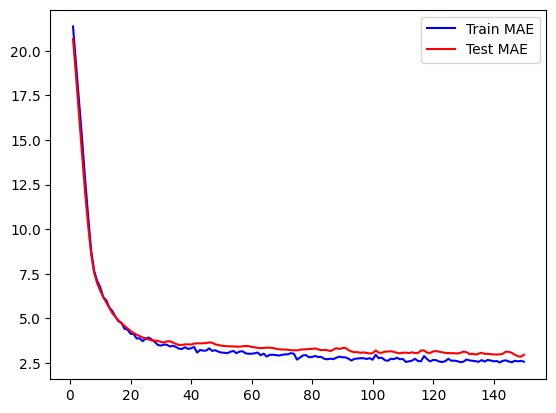

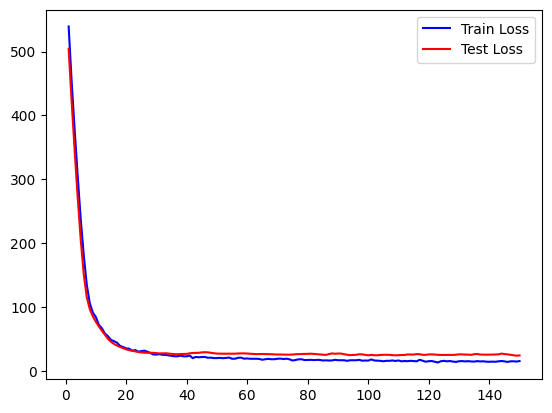

In [9]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Train MAE')
plt.plot(epochs, val_acc, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()